<font color='red'>WARNING-1: No se aceptan soluciones que usen metodologías distintas a las vistas en clases.</font>

<font color='orange'>Está permitido usar los códigos de los ejemplos vistos en clases.</font>



# 0) Cambiar el nombre del archivo

<font color='red'>WARNING-2: CAMBIA EL NOMBRE DEL ARCHIVO ipynb INCLUYENDO TU RUT</font>

Ejemplo, si tu RUT es 12.345.678-9, el nombre de este archivo debe cambiarse de "E02_Tu_Rut.ipynb" a "E02_12345678-9.ipynb"


# 1) Importe las Librerías

(1 Punto)

*Todas las librerías de este código deben ir en esta celda. Sólo está permitido usar las librerías de los ejemplos vistos en clase.*



In [2]:
 # PREGUNTA 1: ESCRIBA CODIGO AQUI
import numpy as np
import cv2
import matplotlib.pyplot as plt

!wget https://www.dropbox.com/s/7gr195hwmjebq8b/clock.png

zsh:1: command not found: wget


# 2) Corrección de Perspectiva

(5 Puntos)

Para la imagen `clock.png`, corrija la perspectiva de tal forma que el reloj se vea de frente.

La imagen se puede descargar aquí:

`https://www.dropbox.com/s/7gr195hwmjebq8b/clock.png`

A manera de ejemplo se muestra cómo debería quedar la imagen de salida, observe que a la salida el borde interno del reloj es ahora circular


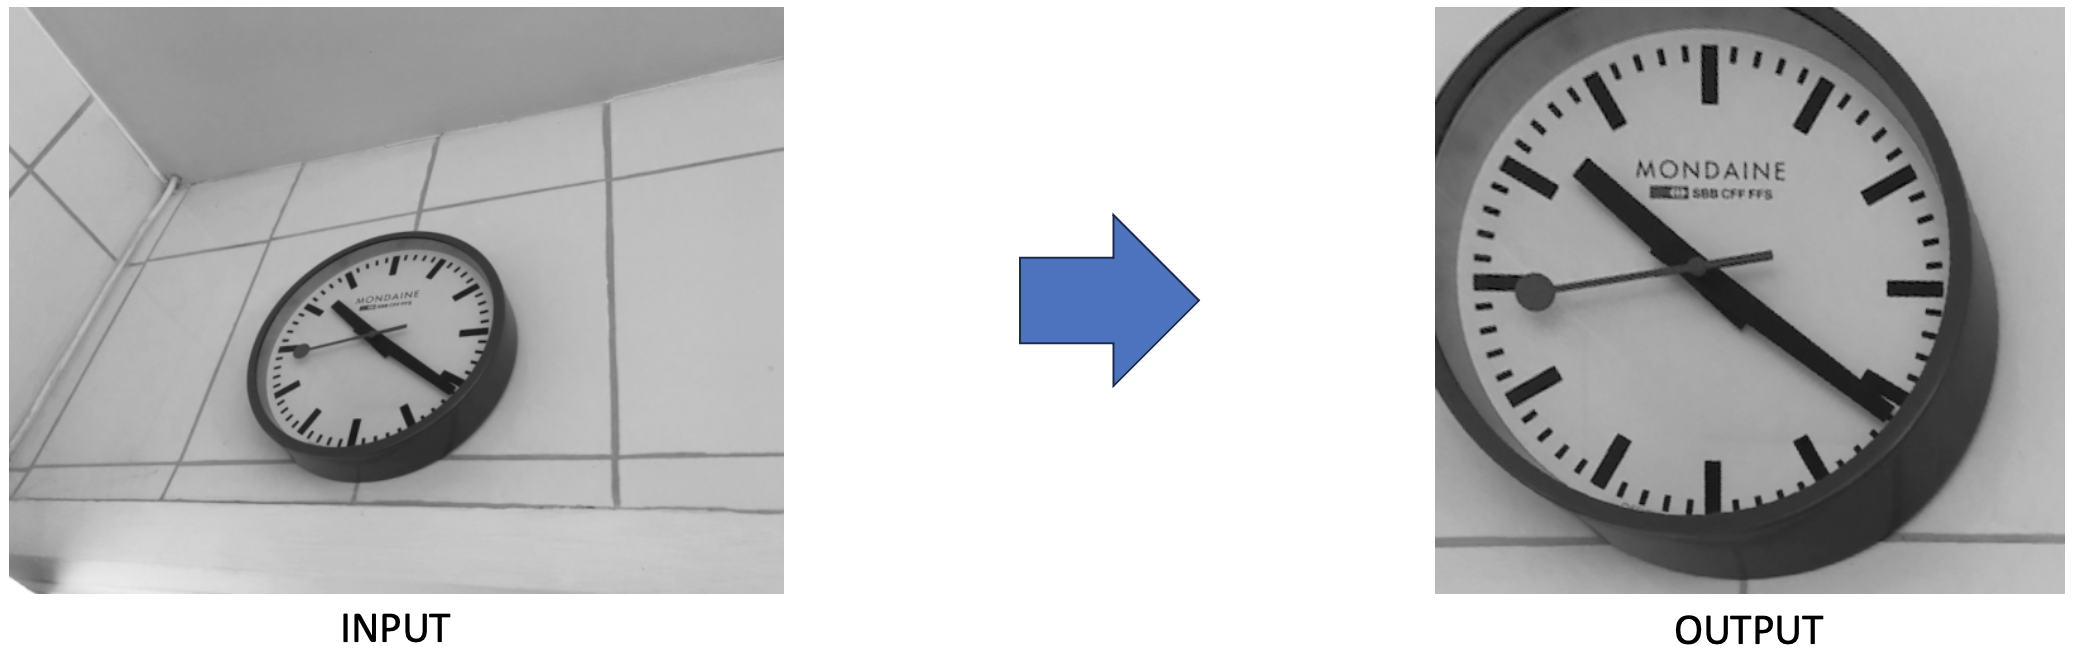

In [6]:
 # PREGUNTA 2: ESCRIBA CODIGO AQUI
def rotation_matriz_2d(theta):
  R = np.array([[np.cos(theta), -np.sin(theta)],
   [np.sin(theta), np.cos(theta)]])
  return R

def homography_matrix(m,mp):
  (x ,y ) = m
  (xp,yp) = mp
  n       = len(x)
  A       = np.zeros((2*n,9))
  for i in range(n):
    j = i*2
    A[j  ,:] = [x[i], y[i], 1,     0,     0, 0, -x[i]*xp[i], -y[i]*xp[i], -xp[i]]
    A[j+1,:] = [  0  ,   0  , 0, x[i], y[i], 1, -x[i]*yp[i], -y[i]*yp[i], -yp[i]]
  [U,S,V] = np.linalg.svd(A)
  h       = V[-1,:]
  H       = np.vstack([h[0:3], h[3:6], h[6:9]])
  return H

def homography(X,H):
  Hinv  = np.linalg.inv(H)
  Xp    = np.zeros((N,M),np.uint8)

  m = np.ones((N*M,3))
  t = 0
  for i in range(N):
    for j in range(M):
      m[t,0:2] = [j,i]
      t = t+1

  mph = np.dot(Hinv,m.T)  # Transformation m to mp
  mp  = np.divide(mph[0:2,:],mph[2,:])
  mpf = np.fix(mp).astype(int)

  ip = mpf[1,:]
  jp = mpf[0,:]
  ktj = np.logical_and(jp>=0,jp<M)
  kti = np.logical_and(ip>=0,ip<N)
  kt  = np.logical_and(kti,ktj)

  t = 0
  for i in range(N):
    for j in range(M):
      if kt[t]:
        Xp[i,j] = X[ip[t],jp[t]]
      t = t+1
  return Xp

size =  (756, 1008)


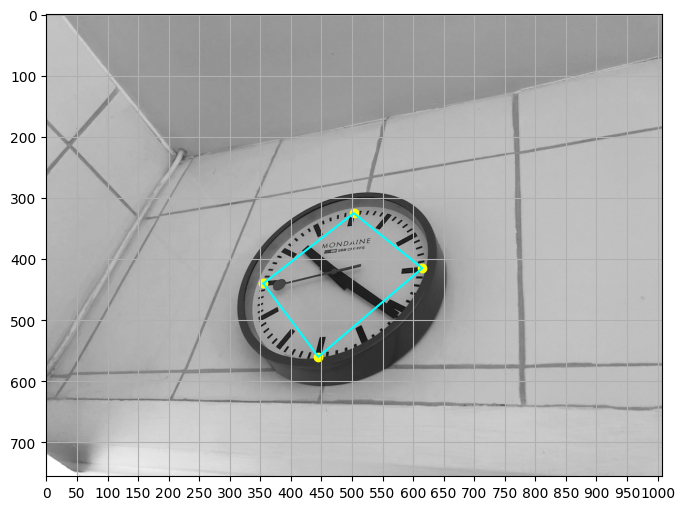

In [7]:
# Corner coordinates of original images (mp = m')
X=cv2.imread('clock.png', 0)
(N,M) = X.shape
print('size = ', X.shape)
xp = np.array([355,503,445, 615])
yp = np.array([440,325, 560,415])
i = np.array([0,1,3,2,0])
plt.figure(figsize=(9,6))
plt.imshow(X,cmap='gray')
plt.plot(xp[i],yp[i], color="cyan")
plt.xticks(np.arange(0,1008, step=50))
plt.grid()
plt.scatter(xp,yp,c='yellow')
plt.show()

mp  =  (array([355, 503, 445, 615]), array([440, 325, 560, 415]))
m   =  (array([ 50, 500, 500, 950]), array([400, 100, 700, 400]))
Estimacion de mp a partir de m:
mps =  (array([355., 503., 445., 615.]), array([440., 325., 560., 415.]))
Imagen izquierda: Transformada                       | Imagen derecha: Original


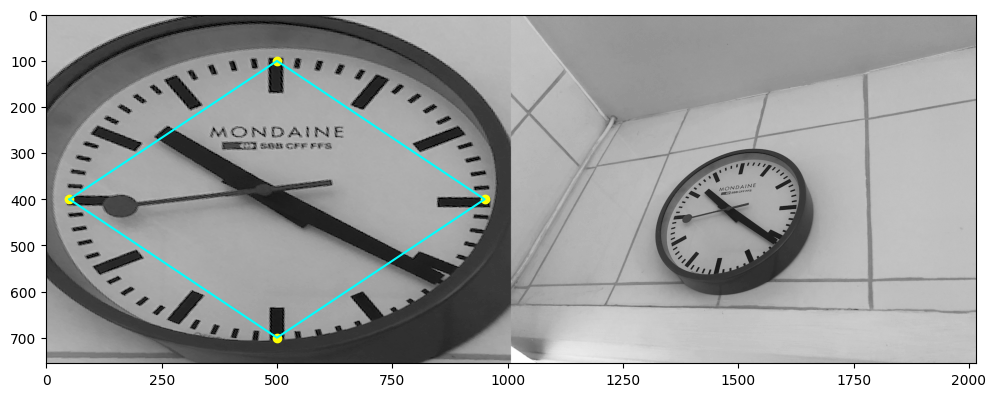

In [8]:
# Corner coordinates of transformed images (m)
x = np.array([50,500,500,950])
y = np.array([400,100,700,400])
print('mp  = ', (xp,yp))
print('m   = ', (x,y))

mm = np.vstack([x, y, np.array([1, 1, 1, 1])])
H2 = homography_matrix((x,y),(xp,yp))
mmp = np.dot(H2,mm)
mmp = mmp/mmp[-1,:]

print('Estimacion de mp a partir de m:')
print('mps = ', (mmp[0,:],mmp[1,:]))
Hinv  = np.linalg.inv(H2)

Y = homography(X,Hinv)
Z = np.concatenate((Y,X),axis=1)

print('Imagen izquierda: Transformada                       | Imagen derecha: Original')
plt.figure(figsize=(12,12))
plt.imshow(Z,cmap='gray')
plt.plot(x[i],y[i], color="cyan")
plt.scatter(x,y,c='yellow')
plt.show()

# 3) Proyección en Perspectiva 3D -> 2D


Una pirámide definido como 5 puntos ${\bf p}_i$ en el sistema de coordenadas $(X_i',Y_i',Z_i')$ con los valores:

$p_1 = (0, 0, 0)$

$p_2 = (2, 0, 0)$

$p_3 = (2, 2, 0)$

$p_4 = (0, 2, 0)$

$p_5 = (1, 1, 2)$

(los primeros 4 puntos son de la base horizontal cuadrada de la pirámide, el último punto es el vértice superior)




## 3.1) Definición de coordenadas homogéneas

(1 punto)

Defina una matriz Mp de 4x5 elementos que defina los 5 puntos de la pirámide en coordenadas homogéneas en el sistema $(X_i',Y_i',Z_i')$. Es decir, los 5 puntos se deben almacenar en la variable Mp de 4x5 elementos, donde cada columna debe ser $(X'_i,Y'_i,Z'_i,1)$.


In [9]:
 # PREGUNTA 3.1: ESCRIBA CODIGO AQUI
P1=[0,0,0]
P2=[2,0,0]
P3=[2,2,0]
P4=[0,2,0]
P5=[1,1,2]

Mp=np.array(
    [[P1[0], P2[0], P3[0], P4[0], P5[0]],
     [P1[1], P2[1], P3[1], P4[1], P5[1]],
     [P1[2], P2[2], P3[2], P4[2], P5[2]],
     [1, 1, 1, 1, 1]])
print("Matriz orgiinal \n", Mp)

Matriz orgiinal 
 [[0 2 2 0 1]
 [0 0 2 2 1]
 [0 0 0 0 2]
 [1 1 1 1 1]]


## 3.2) Transformación 3D -> 3D

(1 punto)

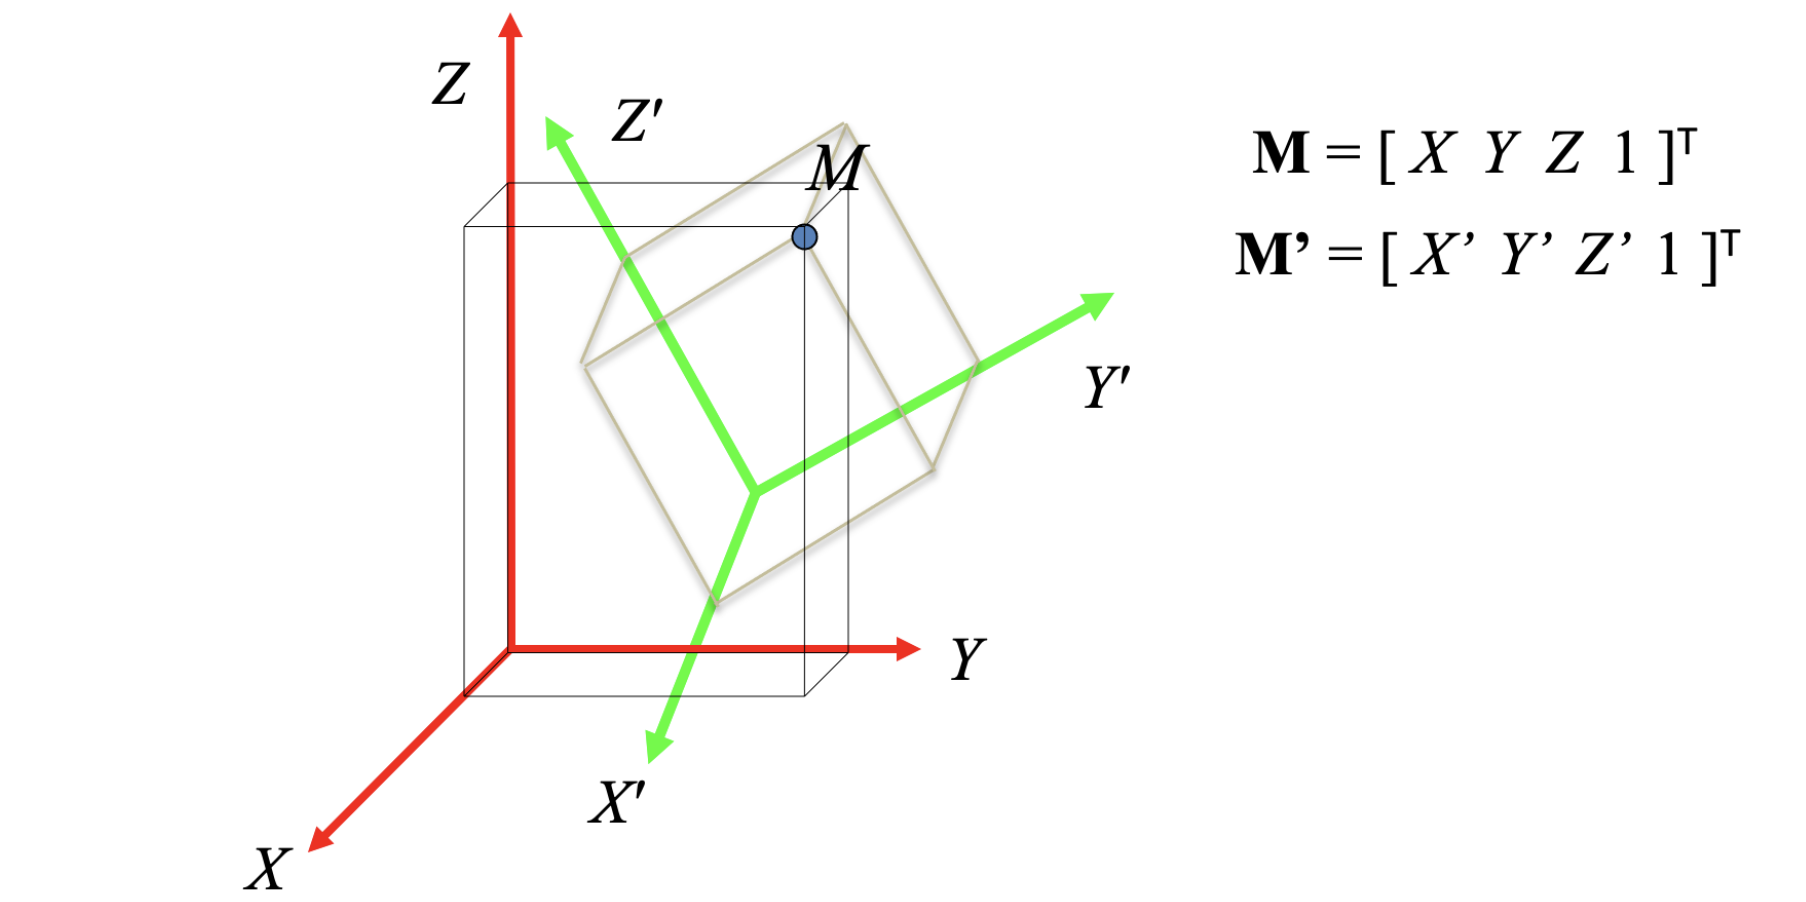

Transforme los puntos de Mp con una transformación Euclideana cuya traslación y rotación son:

* tx = 10

* ty = 20

* tz = 400

* wx = 20 grados

* wy = 30 grados

* wz = 45 grados

Esta transformación es de un sistema de coordenadas $(X',Y',Z')$ a un sistema de coordenadas $(X,Y,Z)$.

Los 5 puntos transformados se deben almacenar en la variable M de 4x5 elementos, donde cada columna debe ser $(X_i,Y_i,Z_i,1)$.



In [10]:
 # PREGUNTA 3.2: ESCRIBA CODIGO AQUI
def rotation_matrix_3d(wx, wy, wz):
  R = np.array([
        [ np.cos(wy) * np.cos(wz), -np.cos(wy) * np.sin(wz),  np.sin(wy)],
        [ np.sin(wx) * np.sin(wy) * np.cos(wz) + np.cos(wx) * np.sin(wz),
         -np.sin(wx) * np.sin(wy) * np.sin(wz) + np.cos(wx) * np.cos(wz),
         -np.sin(wx) * np.cos(wy)],
        [-np.cos(wx) * np.sin(wy) * np.cos(wz) + np.sin(wx) * np.sin(wz),
          np.cos(wx) * np.sin(wy) * np.sin(wz) + np.sin(wx) * np.cos(wz),
          np.cos(wx) * np.cos(wy)]
  ])
  return R

def perspective_matrix(f):
  P = np.array([
        [f, 0, 0, 0],
        [0, f, 0, 0],
        [0, 0, 1, 0]
  ])
  return P

tx = 10
ty = 20
tz = 400
wx = 20
wy = 30
wz = 45

wx_rad=np.radians(wx)
wy_rad=np.radians(wy)
wz_rad=np.radians(wz)

T = np.array([
    [1, 0, 0, tx],
    [0, 1, 0, ty],
    [0, 0, 1, tz],
    [0, 0, 0, 1]
])

R = rotation_matrix_3d(wx_rad, wy_rad, wz_rad)
R_4x4 = np.eye(4)
R_4x4[:3, :3] = R
T_total = np.dot(T, R_4x4)
M =np.dot(T_total, Mp)

print("Matriz transformada")
print(M)

Matriz transformada
[[ 10.          11.22474487  10.           8.77525513  11.        ]
 [ 20.          21.57077081  22.6578521   21.08708129  20.73652978]
 [400.         399.8192265  400.96737905 401.14815255 402.11128489]
 [  1.           1.           1.           1.           1.        ]]


## 3.3) Transformación 3D -> 2D

(1 punto)

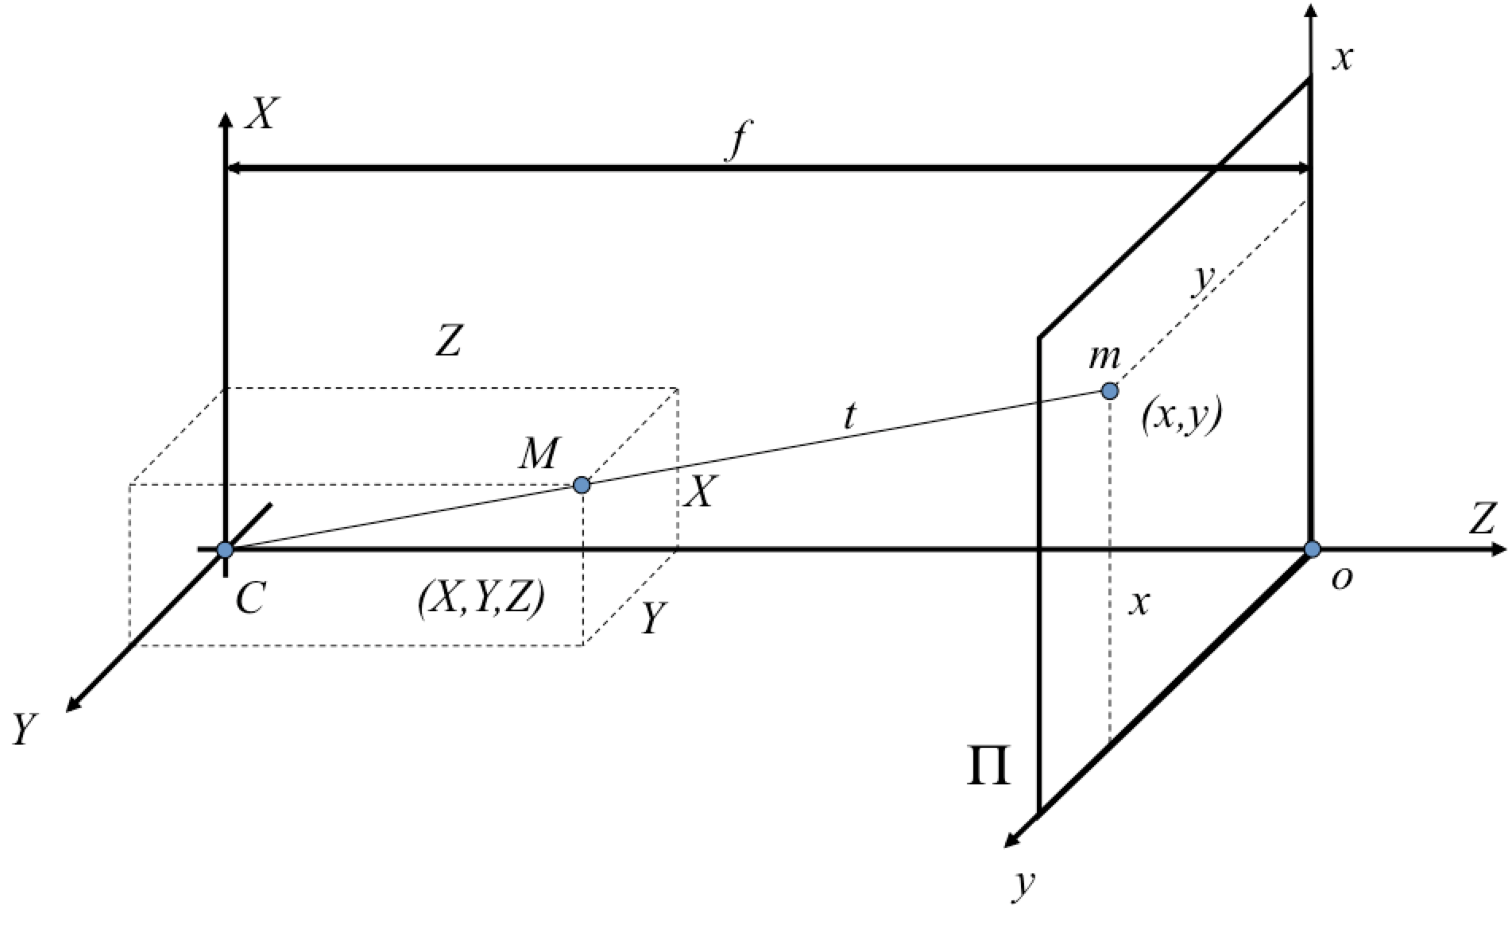

Proyecte los 5 puntos de M, que están en coordenadas $(X,Y,Z)$ a un plano de proyección $(x,y)$ que se encuentra perpendicular al eje $Z$ a una distancia focal $f = 1000$. Los 5 puntos transformados se deben almacenar en la variable m de 3x5 elementos, donde cada columna debe ser $(x_i,y_i,1)$.

In [11]:
 # PREGUNTA 3.3: ESCRIBA CODIGO AQUI
f = 1000
P = perspective_matrix(f)
M_perspective = np.dot(P, M)
m = np.zeros((3, 5))
m[0, :] = M_perspective[0, :] / M_perspective[2, :]
m[1, :] = M_perspective[1, :] / M_perspective[2, :]
m[2, :] = 1

print("Matriz proyectada (m):")
print(m)

Matriz proyectada (m):
[[25.         28.07455002 24.93968468 21.87534723 27.35561128]
 [50.         53.95130945 56.50796868 52.5668164  51.56913164]
 [ 1.          1.          1.          1.          1.        ]]


## 3.4) Transformación 2D -> 2D

(1 punto)

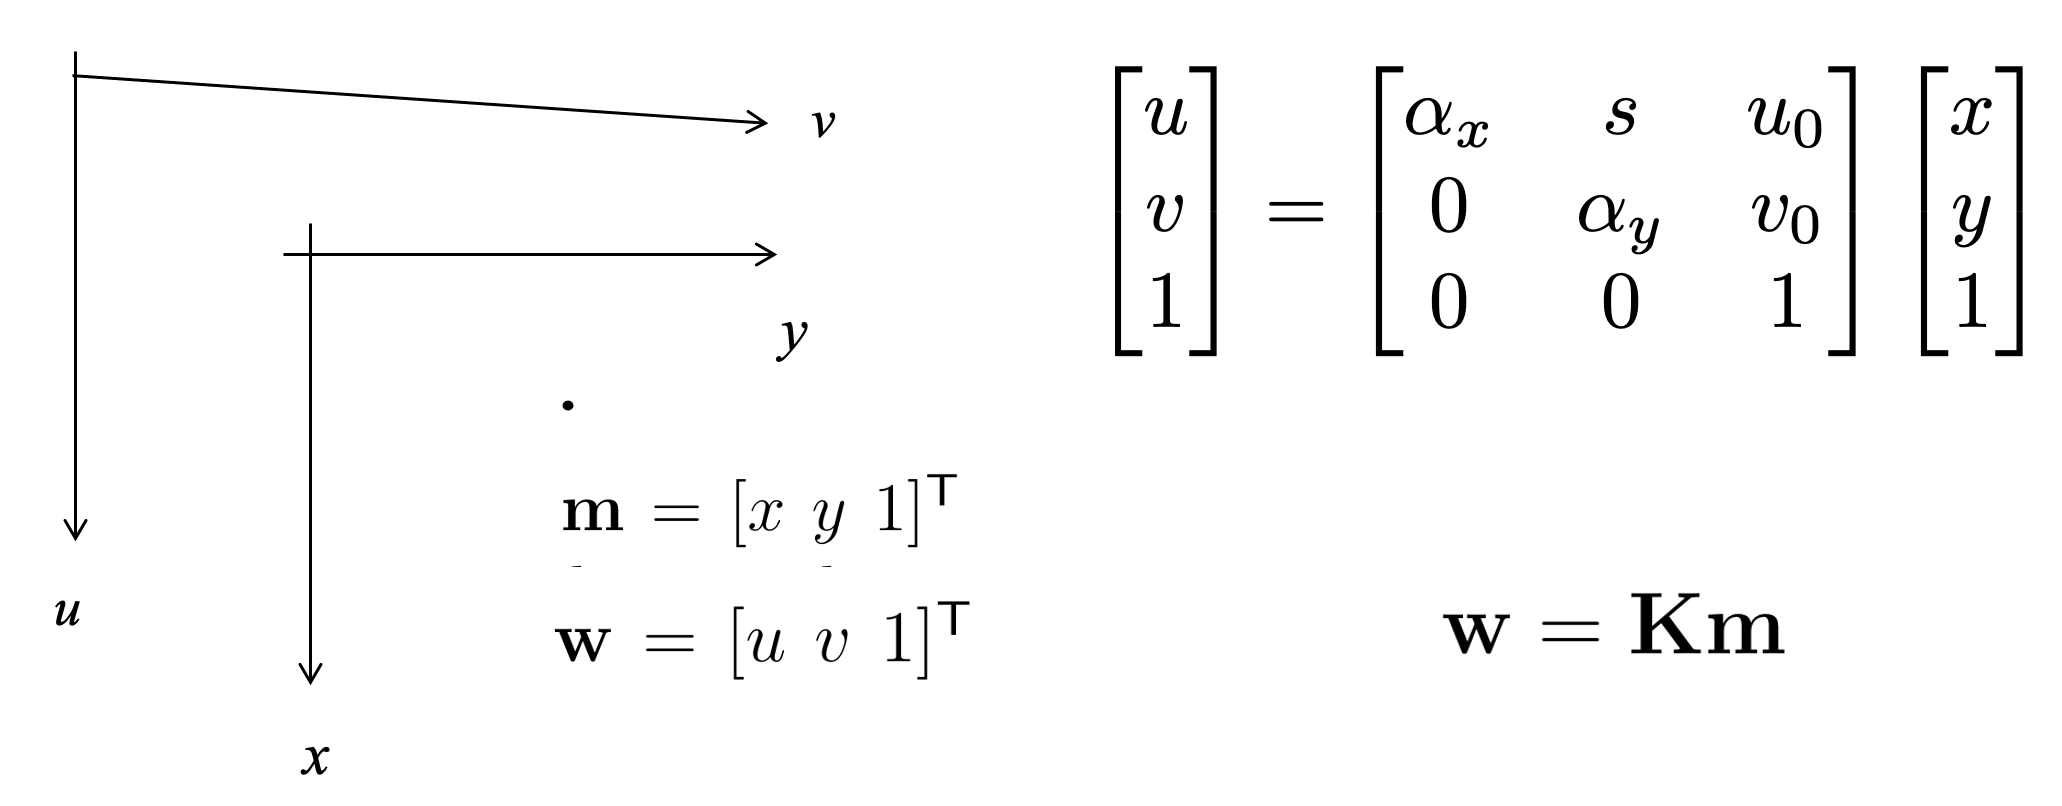



Transforme los 5 puntos del sistema de coordenas $(x,y)$ a las coordenadas de la imagen $(u,v)$ usando la ecuación ${\bf w} = {\bf Km}$ mostrada en la figura. Los elementos de ${\bf K}$ son:

* $\alpha_x = \alpha_y = 3.1$

* $s=0.05$

* $u_0 = 110$

* $v_0 = 235$

Los 5 puntos transformados se deben almacenar en la variable w de 3x5 elementos, donde cada columna debe ser $(u_i,v_i,1)$.


In [12]:
 # PREGUNTA 3.4: ESCRIBA CODIGO AQUI
alpha_x = 3.1
alpha_y = 3.1
s = 0.05
u_0 = 110
v_0 = 235

K = np.array([
    [alpha_x, s, u_0],
    [0, alpha_y, v_0],
    [0, 0, 1]
])

w = np.dot(K, m)

print("w")
print(w)

w
[[190.         199.72867052 190.13842094 180.44191724 197.38085154]
 [390.         402.24905928 410.17470291 397.95713085 394.86430808]
 [  1.           1.           1.           1.           1.        ]]


## 3.5 Transformación total 3D -> 2D

(1 punto)

Encuentre la matriz ${\bf A}$ tal que realice la transformación de $(X',Y',Z')$ a $(u,v)$, es decir que cumpla esta ecuación:

$\lambda {\bf w} = {\bf A}{\bf M}'$.

Para verificar que la matriz ${\bf A}$ esté correcta, realice la multiplicación de A por la matriz Mp y encuentre w. El resultado debe ser exactamente el mismo del paso anterior.

In [13]:
 # PREGUNTA 3.5: ESCRIBA CODIGO AQUI
T_perspective = np.dot(P, T_total)
T_total_3x4 = T_perspective[:3, :]
A = np.dot(K, T_total_3x4)
AMp = np.dot(A, Mp)
lambda_vals = AMp[2, :]
w_2 = AMp / lambda_vals

print("w_2")
print(w_2)

w_2
[[190.         199.72867052 190.13842094 180.44191724 197.38085154]
 [390.         402.24905928 410.17470291 397.95713085 394.86430808]
 [  1.           1.           1.           1.           1.        ]]


## 3.6) Grafica

(1 punto)

Grafique la pirámide proyecta en las coordenadas $(u,v)$. En esta gráfica deben estar tanto los vértices como las líneas que unen los vértices de la pirámide.

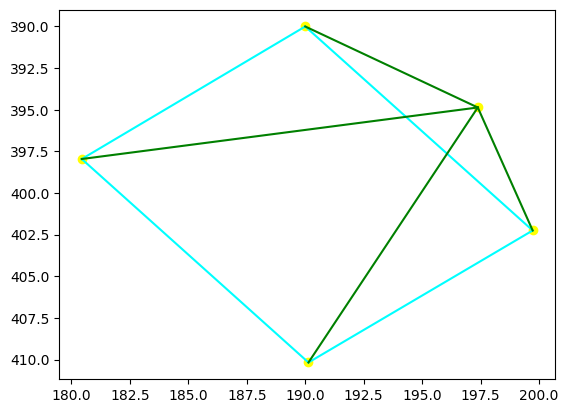

In [14]:
 # PREGUNTA 3.6: ESCRIBA CODIGO AQUI
u = w[0, :]
v = w[1, :]
plt.figure()
plt.scatter(u, v, color='yellow')
edges = [
    [(0, 1), (1, 2), (2, 3), (3, 0)],
    [(0, 4), (1, 4), (2, 4), (3, 4)]
]

for edge in edges[0]:
    plt.plot([u[edge[0]], u[edge[1]]], [v[edge[0]], v[edge[1]]], color='cyan')

for edge in edges[1]:
    plt.plot([u[edge[0]], u[edge[1]]], [v[edge[0]], v[edge[1]]], color='green')
plt.gca().invert_yaxis()
plt.show()

# <font color='red'>SUBIR EJERCICIO DE FORMA INDIVIDUAL A CANVAS</font>

